In [136]:
import pandas as pd
import numpy as np
import os

In [137]:
fileLoc = './all-crypto-currencies/crypto-markets.csv'
data = pd.read_csv(fileLoc)
data = data.dropna()

In [138]:
direc = "./prediction_files/"
directory = os.path.dirname(direc)
if not os.path.exists(directory):
    os.makedirs(directory)

In [139]:
data_name_unique = ['ETC']

In [140]:
import numpy
import matplotlib.pyplot as plt
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [141]:
#Convert an array of values into a dataset matrix
def dataset_generate(data, step_size=1):
    dataX, dataY = [], []
    for i in range(len(data)- step_size -1):
        a = data[i:(i+ step_size), 0]
        dataX.append(a)
        dataY.append(data[i + step_size, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [142]:
def predict(days, coin_name, feature):
    new_data = {}
    coin = data.loc[data['symbol'] == coin_name]
    coin_close = coin[[feature]].reset_index(drop=True)
    print(coin_name)
    print(coin_close)
    new_data[coin_name] = coin_close
    for coin_name in data_name_unique[:3]:
        plt.plot(new_data[coin_name])
        plt.show()    
    
    #Fix random seed for reproducibility
    numpy.random.seed(7)
    dataset = new_data[coin_name]
    dataset = dataset.values
    dataset = dataset.astype('float32')
    
    #dataset = dataset.reshape(-1,1)
 
    #Normalize the dataset
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)
    # split into train and test sets
    # Split into train and test sets
    train_size = len(dataset)
    train = dataset[0:train_size,:]

    # Reshape into X=t and Y=t+1
    step_size = 1
    trainX, trainY = dataset_generate(train, step_size)
        
    # Reshape input to be [samples, time steps, features]
    trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
        
    model = Sequential()
    model.add(LSTM(100, activation='tanh', input_dim= step_size))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(trainX, trainY, nb_epoch=1, batch_size=1, verbose=2)
    # make predictions

    trainPredict = model.predict(trainX)
    trainLen = len(trainPredict)
    testPredict = []
 
    input = trainY[-1]
    temp = [[input]]
    predX = [temp]
 
    a = model.predict(numpy.array(predX))
    b = a.tolist ()
    predX = [b]
    testPredict.append(b[0])
    
    for i in range(days):
        print ('Iteration %d: Done' % i)
        trainX = numpy.concatenate([trainX, [b]])
        trainY = numpy.concatenate ([trainY, b[0]])
        model.fit (trainX, trainY, nb_epoch=1, batch_size=1, verbose=2)
        a = model.predict (numpy.array ([b]))
        b = a.tolist ()
        testPredict.append (b[0])
        print ('Prediction %d:'%i, b)
    
    testPredict = numpy.array(testPredict)
    filename = direc+"coin_"+coin_name+"_"+feature+".txt";
    
    testPredict.tofile(filename, sep=',', format="%s")
    
    # invert predictions
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(numpy.array(testPredict))

    testPredict = numpy.pad(testPredict, (len(trainPredict),0), 'constant', constant_values=(np.nan, 0))
    
    # plot baseline and predictions
    plt.figure(figsize=(50,30))
    plt.tick_params(axis='both', which='major', labelsize=40)
    plt.tick_params(axis='both', which='minor', labelsize=40)

    a = plt.plot(scaler.inverse_transform(dataset), label='dataset', linewidth=7.0)
    b = plt.plot(trainPredict, label='Trained Predicton', linewidth=7.0)
    c = plt.plot(testPredict, label='Test Prediction', linewidth=7.0)
    plt.legend(loc=2, prop={'size': 40}, labels=["dataset",'Trained Predicton','Test Prediction'])
    plt.ylabel('Close Price', fontsize=50)
    plt.xlabel('Time Series Data from 2013 to 2018', fontsize=50)
    plt.show()

ETC
         close
0     0.928814
1     0.602402
2     2.550000
3     1.600000
4     1.730000
5     1.640000
6     1.570000
7     1.800000
8     2.340000
9     2.760000
10    2.600000
11    2.340000
12    2.590000
13    2.700000
14    2.150000
15    2.190000
16    1.950000
17    1.710000
18    1.850000
19    1.850000
20    1.870000
21    1.930000
22    1.860000
23    1.860000
24    1.740000
25    1.690000
26    1.790000
27    1.740000
28    1.720000
29    1.670000
..         ...
580  38.840000
581  36.410000
582  36.080000
583  36.250000
584  33.690000
585  33.760000
586  30.770000
587  29.190000
588  29.690000
589  26.840000
590  25.100000
591  22.120000
592  22.670000
593  22.480000
594  20.910000
595  21.580000
596  20.500000
597  19.920000
598  17.150000
599  18.410000
600  17.780000
601  16.320000
602  16.790000
603  19.650000
604  20.210000
605  19.800000
606  19.670000
607  19.040000
608  18.500000
609  18.090000

[610 rows x 1 columns]


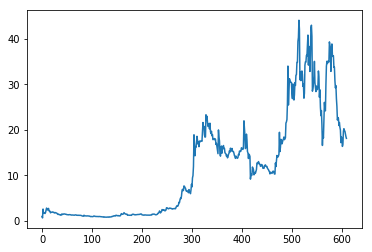

C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
C:\Users\raghu\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(100, activation="tanh", input_shape=(None, 1))`
C:\Users\raghu\Anaconda3\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/1
 - 3s - loss: 0.0212
Iteration 0: Done
Epoch 1/1
 - 1s - loss: 0.0016
Prediction 0: [[0.38498231768608093]]
Iteration 1: Done
Epoch 1/1
 - 1s - loss: 0.0015
Prediction 1: [[0.39856797456741333]]
Iteration 2: Done
Epoch 1/1
 - 2s - loss: 0.0016
Prediction 2: [[0.38103485107421875]]
Iteration 3: Done
Epoch 1/1
 - 1s - loss: 0.0015
Prediction 3: [[0.36697810888290405]]
Iteration 4: Done
Epoch 1/1
 - 2s - loss: 0.0016
Prediction 4: [[0.34700533747673035]]
Iteration 5: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 5: [[0.3671468496322632]]
Iteration 6: Done
Epoch 1/1
 - 2s - loss: 0.0014
Prediction 6: [[0.3913443386554718]]
Iteration 7: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 7: [[0.38574594259262085]]
Iteration 8: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 8: [[0.3807433545589447]]
Iteration 9: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 9: [[0.385809987783432]]


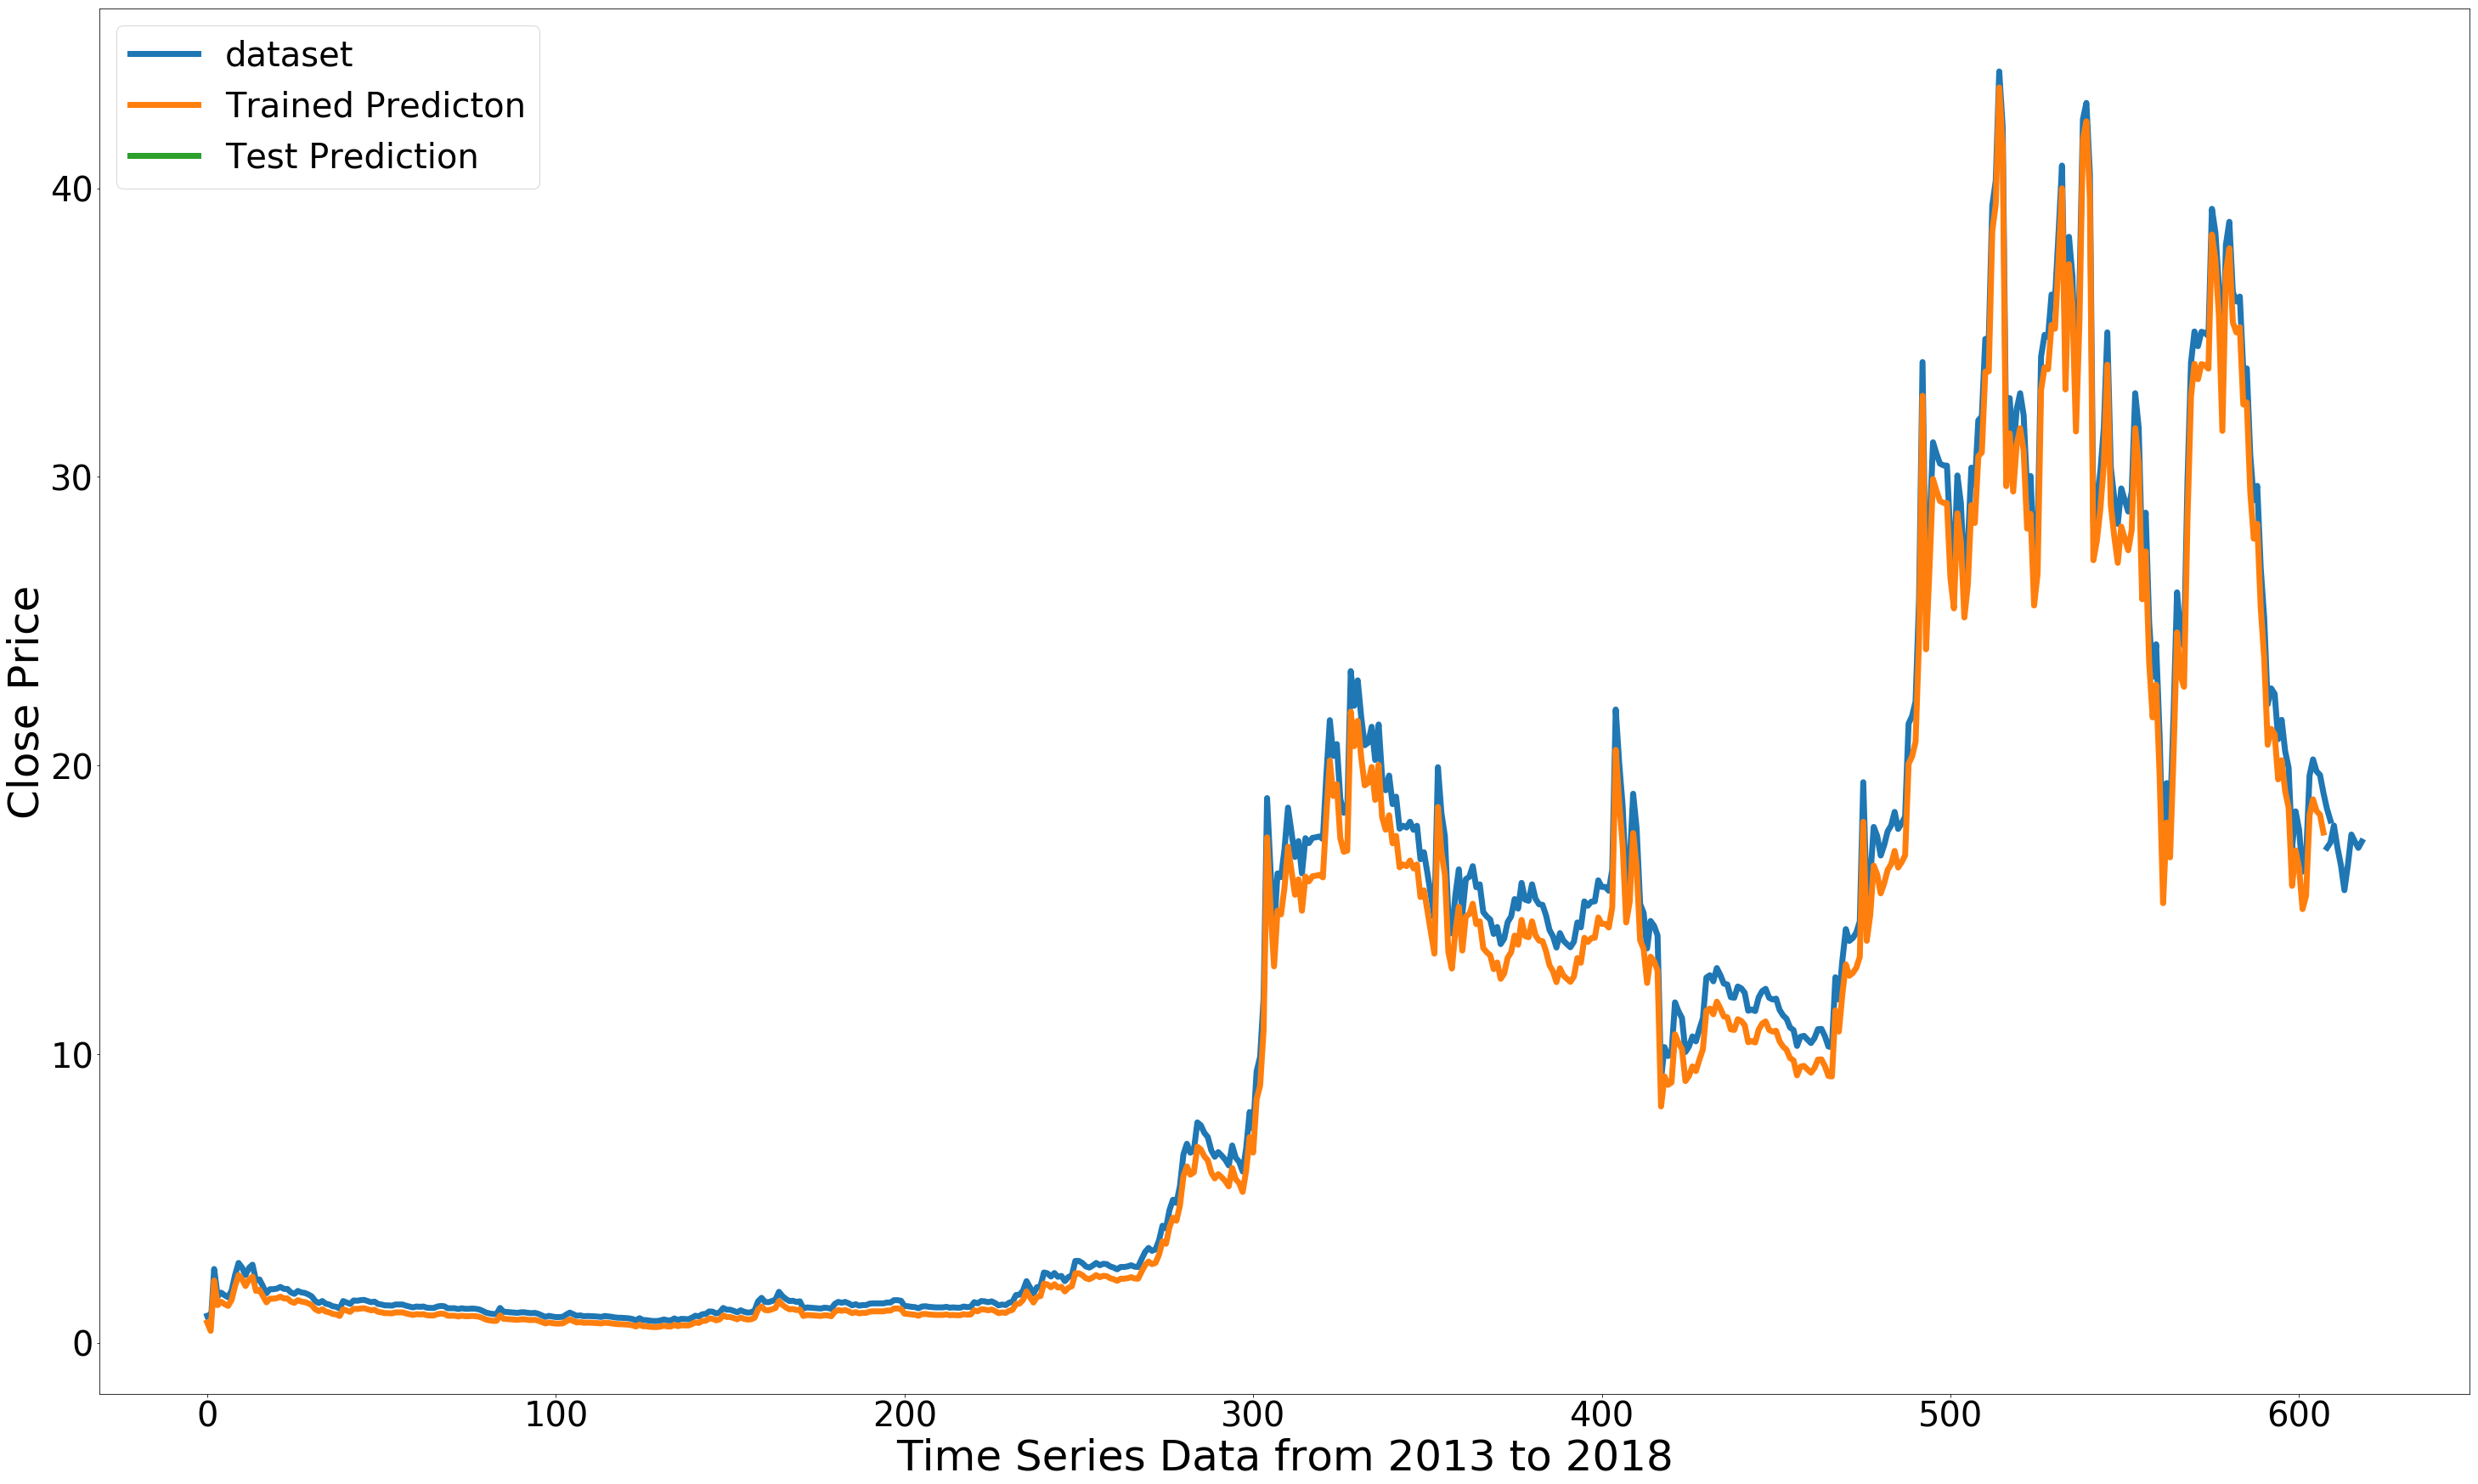

ETC
           market
0    0.000000e+00
1    7.670060e+07
2    4.976830e+07
3    2.023150e+08
4    1.285300e+08
5    1.408870e+08
6    1.362130e+08
7    1.292650e+08
8    1.475480e+08
9    1.943180e+08
10   2.287120e+08
11   2.133750e+08
12   1.934120e+08
13   2.130440e+08
14   2.226830e+08
15   1.784350e+08
16   1.799780e+08
17   1.609830e+08
18   1.422680e+08
19   1.527970e+08
20   1.539180e+08
21   1.549460e+08
22   1.598980e+08
23   1.547860e+08
24   1.544580e+08
25   1.446970e+08
26   1.399260e+08
27   1.479570e+08
28   1.451100e+08
29   1.435960e+08
..            ...
580  3.785310e+09
581  3.861100e+09
582  3.689630e+09
583  3.628860e+09
584  3.606200e+09
585  3.370090e+09
586  3.382540e+09
587  3.086730e+09
588  2.923270e+09
589  2.973110e+09
590  2.690760e+09
591  2.514490e+09
592  2.226360e+09
593  2.279350e+09
594  2.260360e+09
595  2.096350e+09
596  2.166290e+09
597  2.055300e+09
598  2.004500e+09
599  1.727880e+09
600  1.859700e+09
601  1.785600e+09
602  1.634110e+09
603  1

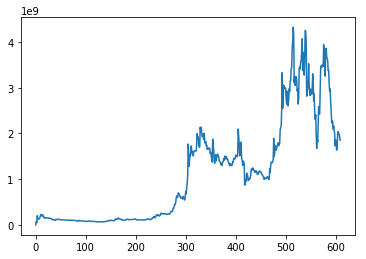

Epoch 1/1
 - 5s - loss: 0.0240
Iteration 0: Done
Epoch 1/1
 - 1s - loss: 0.0014
Prediction 0: [[0.4330361783504486]]
Iteration 1: Done
Epoch 1/1
 - 1s - loss: 0.0016
Prediction 1: [[0.4378429055213928]]
Iteration 2: Done
Epoch 1/1
 - 1s - loss: 0.0015
Prediction 2: [[0.4428340196609497]]
Iteration 3: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 3: [[0.43870481848716736]]
Iteration 4: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 4: [[0.4561918079853058]]
Iteration 5: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 5: [[0.4668103754520416]]
Iteration 6: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 6: [[0.475658655166626]]
Iteration 7: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 7: [[0.4729287624359131]]
Iteration 8: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 8: [[0.480769544839859]]
Iteration 9: Done
Epoch 1/1
 - 2s - loss: 0.0015
Prediction 9: [[0.5012097358703613]]


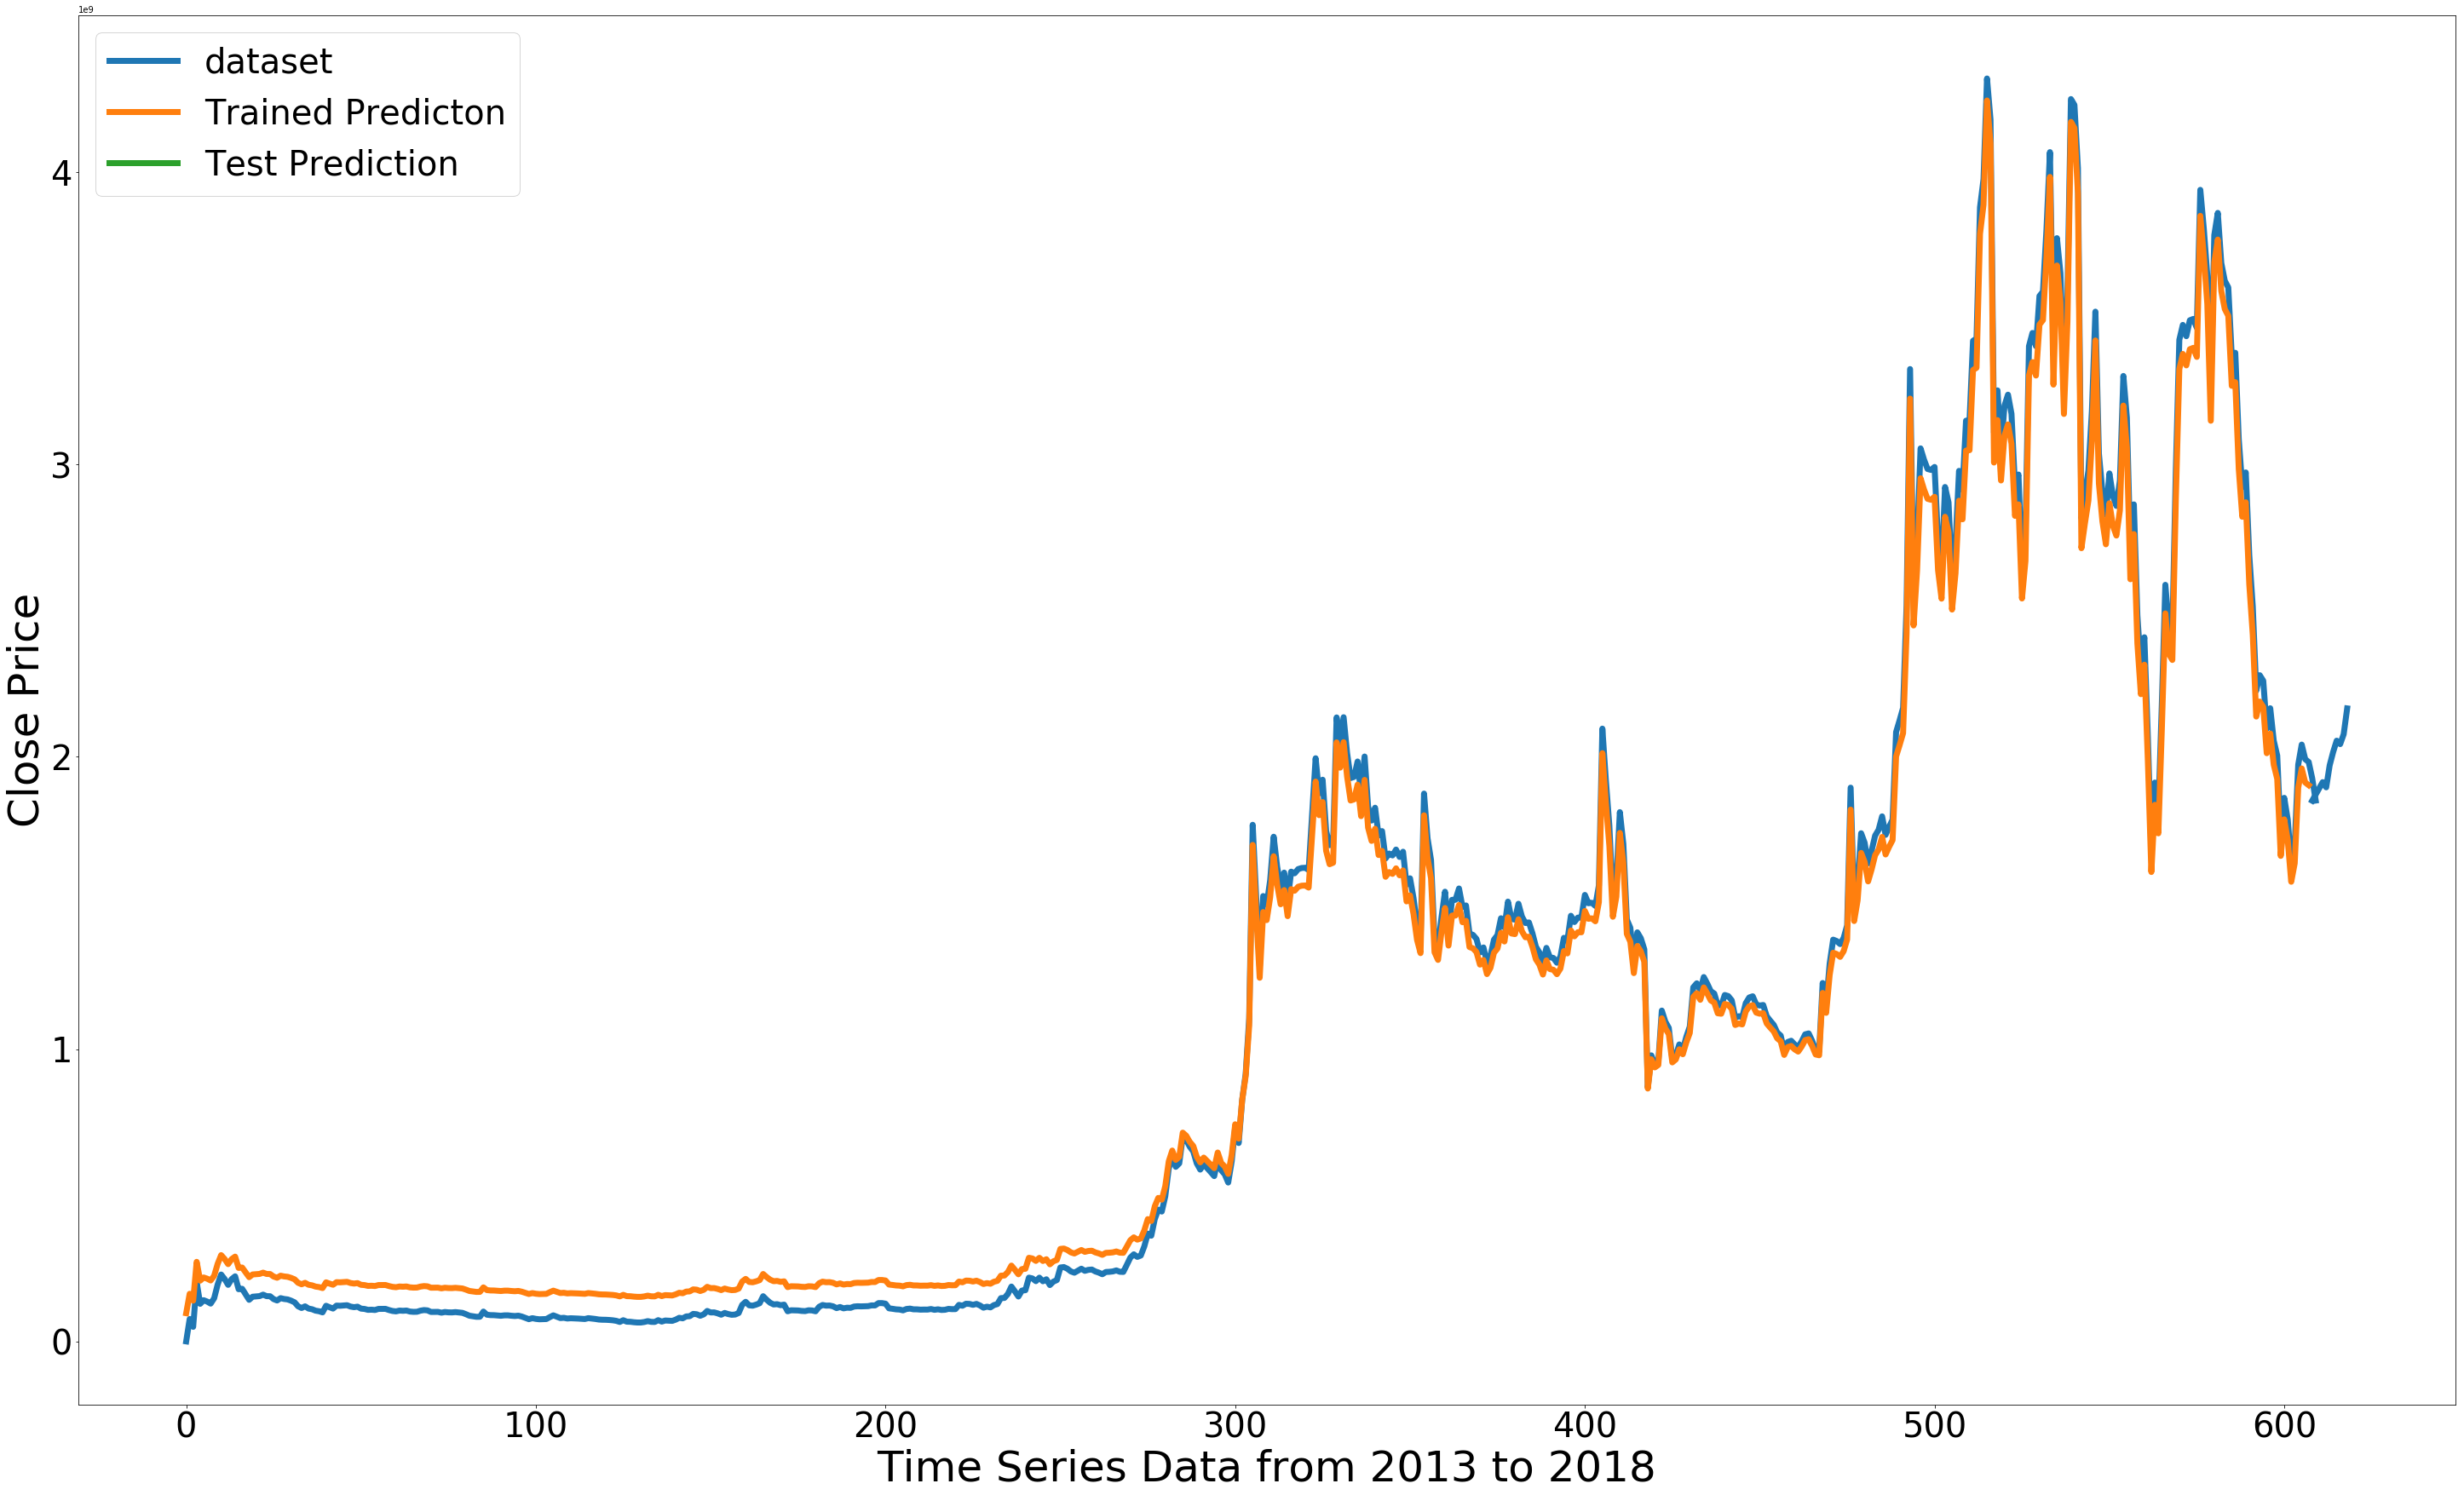

In [143]:
for coin_name in data_name_unique:
    predict(10, coin_name, 'close')
    predict(10, coin_name, 'market')